In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [8, 4] #default figure size

In [3]:
def usagerange(x):
    i = 40
    while i <= 200:
        if i+20 >= x >= i:
            break
        i += 20
    return str(i) + '-' + str(i+20) + 'minutes'

In [4]:
df = pd.read_csv('./test.csv')
df = df.drop('User_ID', axis=1)
df.iloc[46,0], df.iloc[46,1] = df.iloc[46,1],df.iloc[46,0]
df.Age = df.Age.astype(int)
df.rename({'Daily_Usage_Time (minutes)': 'Daily_Usage'}, axis=1, inplace=True)
df = df[df["Gender"].str.contains("Marie") == False]
df['Daily_Usage_Range'] = df.Daily_Usage.apply(usagerange)
df.head()

,Age,Gender,Platform,Daily_Usage,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Range
0,27,Female,Snapchat,120,4,40,18,22,Neutral,100-120minutes
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral,40-60minutes
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety,100-120minutes
3,27,Male,Telegram,105,3,48,20,28,Anxiety,100-120minutes
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral,40-60minutes


In [4]:
def platformemotion(i):
    hueorder = ['Happiness','Neutral','Boredom','Anxiety','Sadness','Anger']
    sns.countplot(data=i, x = 'Platform', hue="Dominant_Emotion", hue_order=hueorder, palette= "muted")

In [5]:
def usageemotion(i):
    hueorder = ['Happiness','Neutral','Boredom','Anxiety','Sadness','Anger']
    xorder = ['40-60minutes','60-80minutes','80-100minutes','100-120minutes','120-140minutes','140-160minutes','160-180minutes','180-200minutes']
    sns.countplot(data=i, x = 'Daily_Usage_Range', hue="Dominant_Emotion",order=xorder, hue_order=hueorder, palette= "muted")

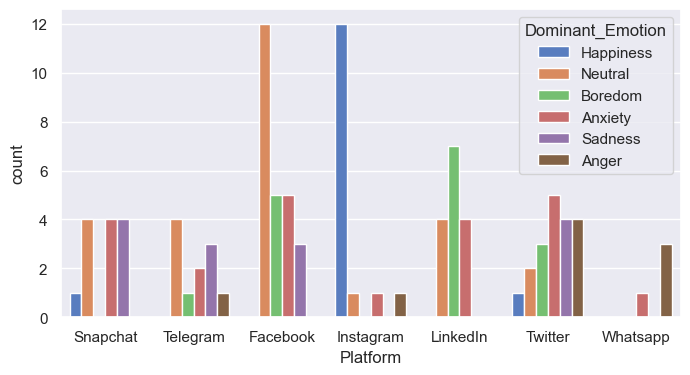

In [6]:
platformemotion(df)
#which emotion dominate the individual from a platform

Findings:
1. happiest : IG
2. most bored: linkedin
3. most negative (anxiety+sadness+anger): twitter/whatsapp

In [49]:
df.Gender.value_counts()

Gender
Male          47
Non-binary    30
Female        25
Name: count, dtype: int64

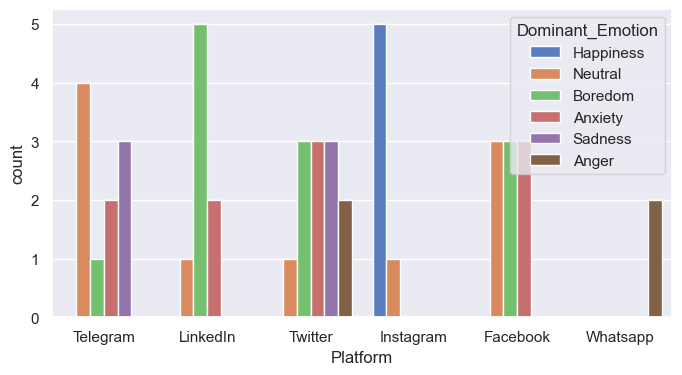

In [10]:
platformemotion(df[df.Gender=='Male'])

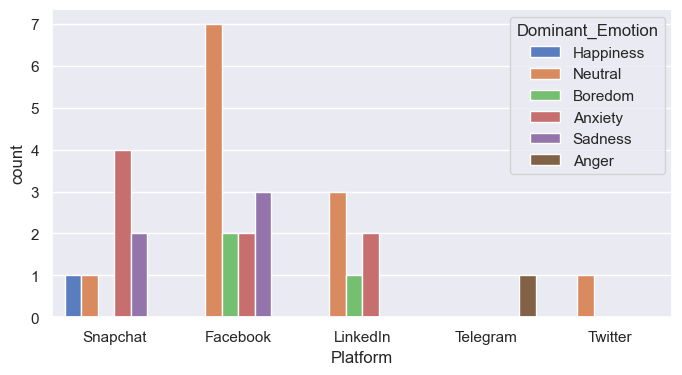

In [11]:
platformemotion(df[df.Gender=='Non-binary'])

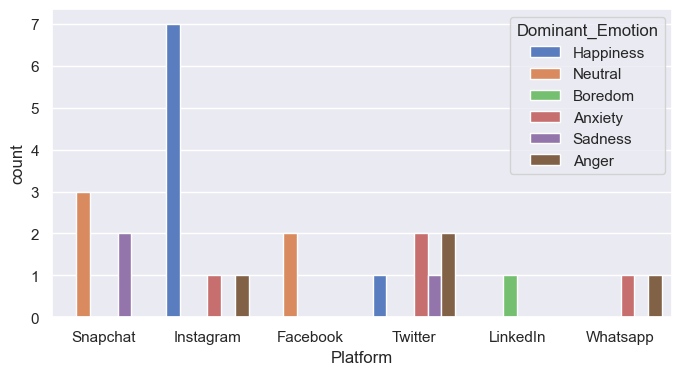

In [12]:
platformemotion(df[df.Gender=='Female'])

In [24]:
df.Daily_Usage.min()

40

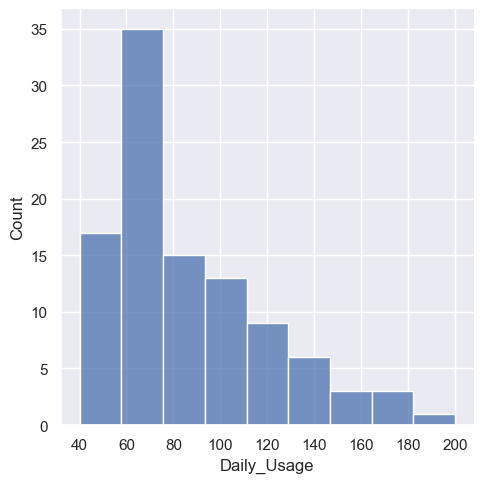

In [24]:
sns.displot(df.Daily_Usage)

Finding: More than 80% people spend at least an hour daily on social media

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '40-60minutes'),
  Text(1, 0, '60-80minutes'),
  Text(2, 0, '80-100minutes'),
  Text(3, 0, '100-120minutes'),
  Text(4, 0, '120-140minutes'),
  Text(5, 0, '140-160minutes'),
  Text(6, 0, '160-180minutes'),
  Text(7, 0, '180-200minutes')])

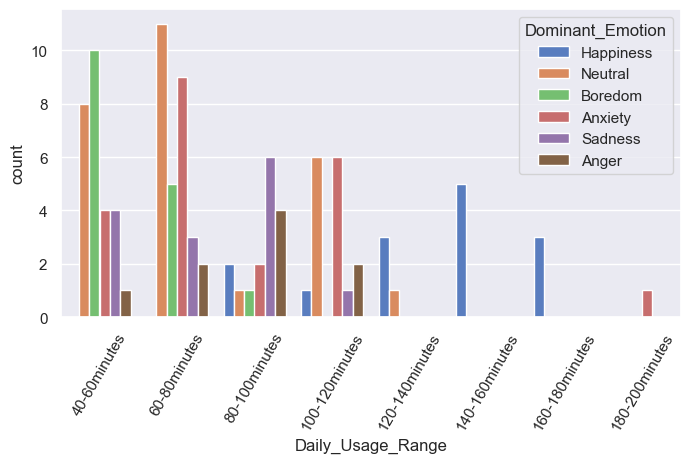

In [23]:
usageemotion(df)
plt.xticks(rotation=60)

<Axes: xlabel='Platform', ylabel='Daily_Usage'>

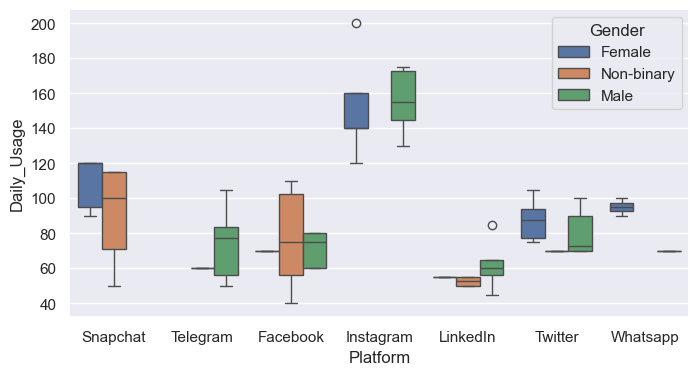

In [26]:
sns.boxplot(data = df,x="Platform",y="Daily_Usage", hue="Gender")

Findings:
1. people spend more time on IG
2. people spend less time on linkedin
3. snapchat is not popular among males (0/47)
4. TG is not popular among females (0/25)
5. IG and Whatsapp are not popular among non-binary (0/30)
6. The difference in gender does not say much about how much time one would spend on social media

<Axes: xlabel='Dominant_Emotion'>

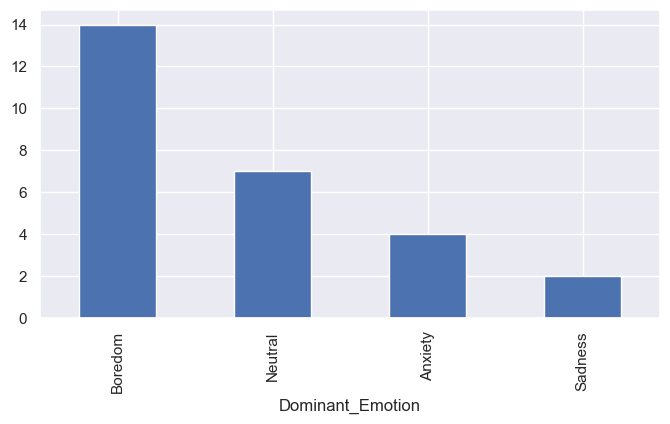

In [21]:
df[df.Likes_Received_Per_Day<=df.Likes_Received_Per_Day.quantile(0.25)].Dominant_Emotion.value_counts().plot.bar()

Finding: People with fewer likes received tend to feel less happy and more bored

<Axes: xlabel='Dominant_Emotion'>

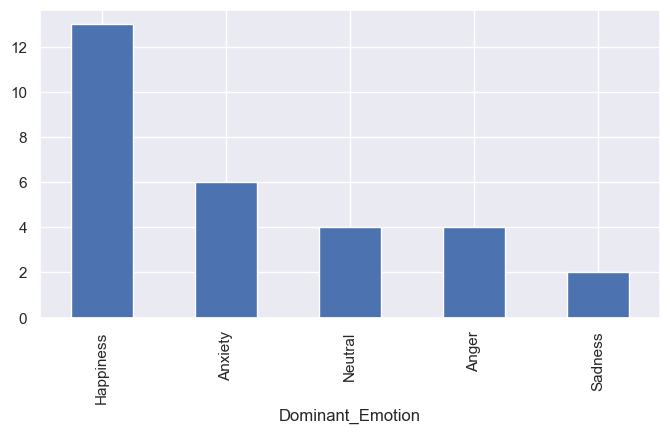

In [22]:
df[df.Likes_Received_Per_Day>=df.Likes_Received_Per_Day.quantile(0.75)].Dominant_Emotion.value_counts().plot.bar()

Findings:
1. people with more likes tend to feel happier and less bored
2. but they also tend to feel more negative (anxiety+sadness+anger)

In [7]:
df_quantity = df.iloc[:,0:8].drop(['Gender','Platform'], axis=1)
df_quantity.head()


,Age,Daily_Usage,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,27,120,4,40,18,22
1,21,60,1,18,7,12
2,28,115,3,38,18,27
3,27,105,3,48,20,28
4,21,55,3,17,7,12


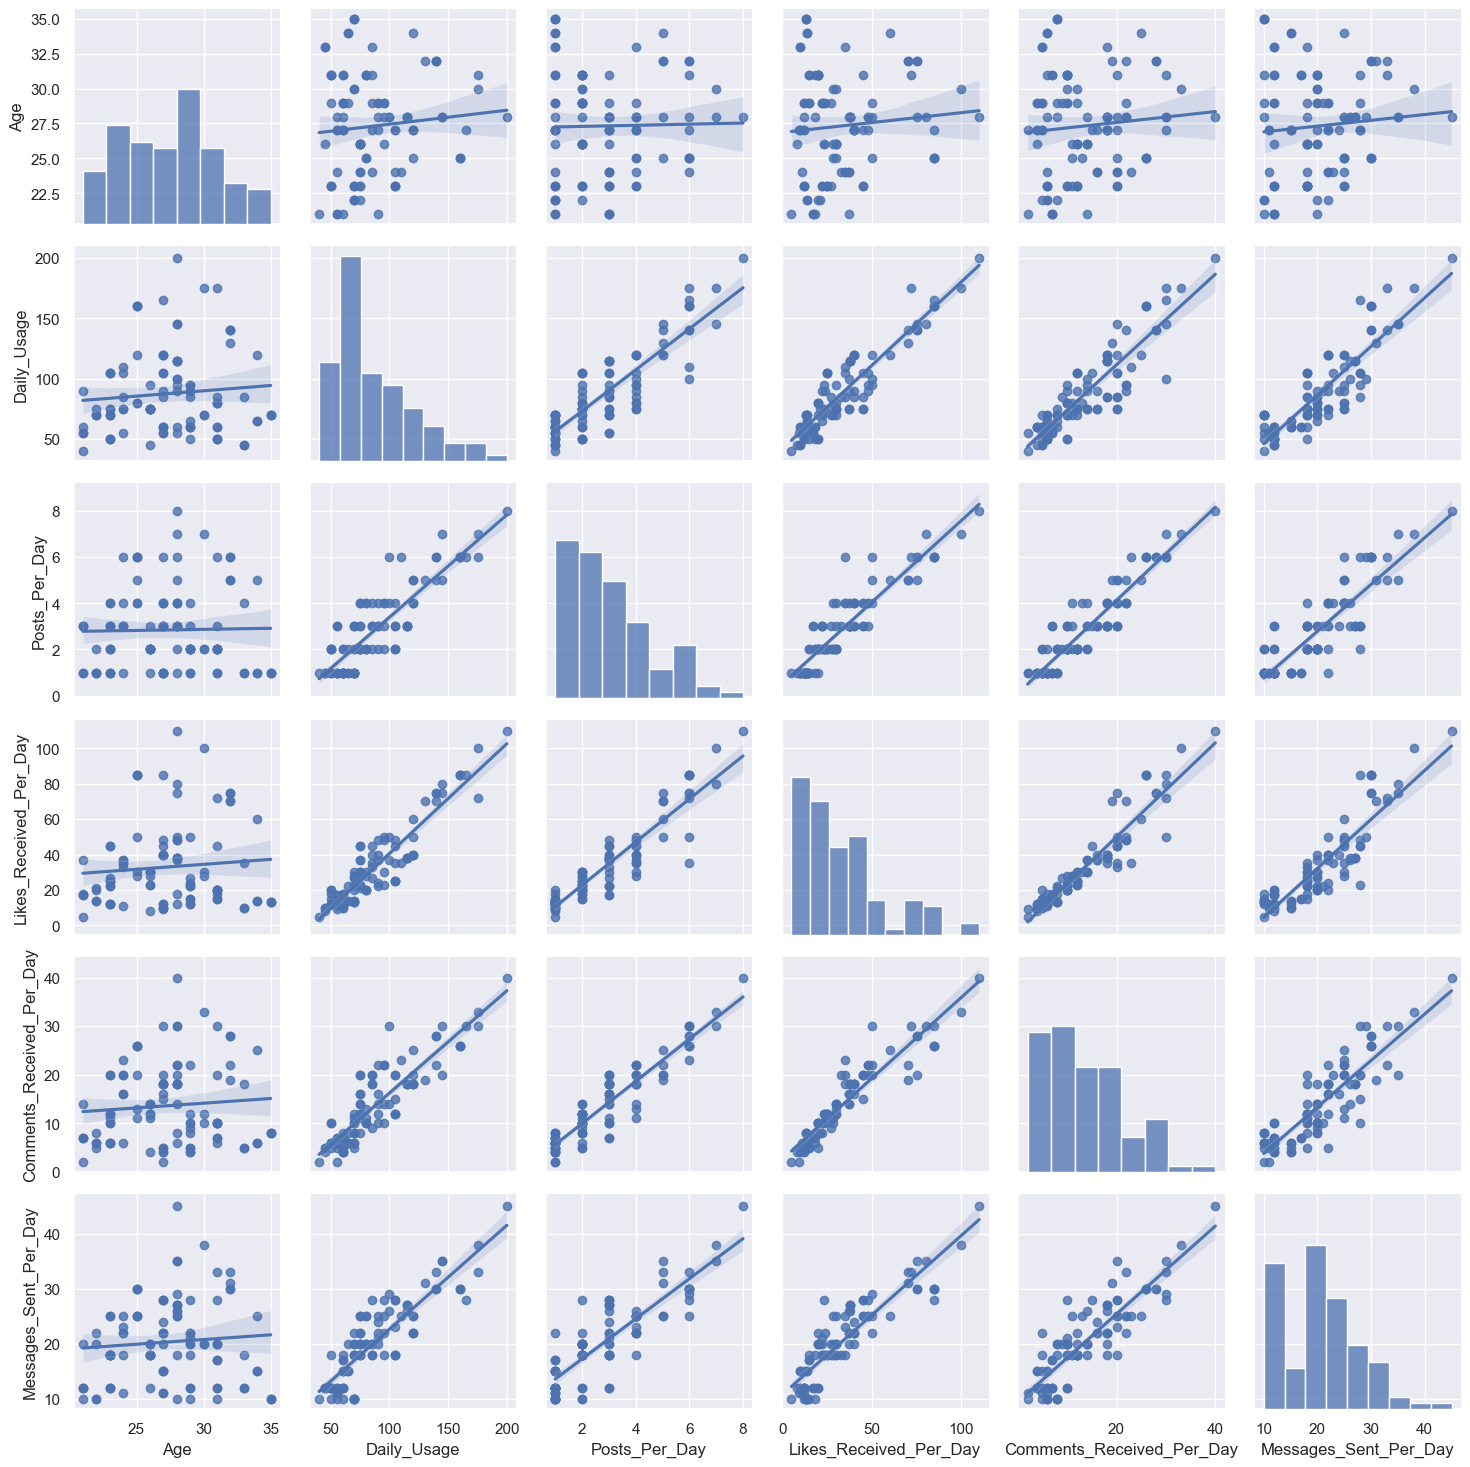

In [30]:
g = sns.PairGrid(df_quantity)
g.map_diag(sns.histplot)#Plotting the distribution
g.map_offdiag(sns.regplot)

Findings: 
1. daily usage, posts, msgs sent & likes/comments received are right skewed (mean>median)
--> its most likely the case that a few individuals care about social media way more than others

<Axes: >

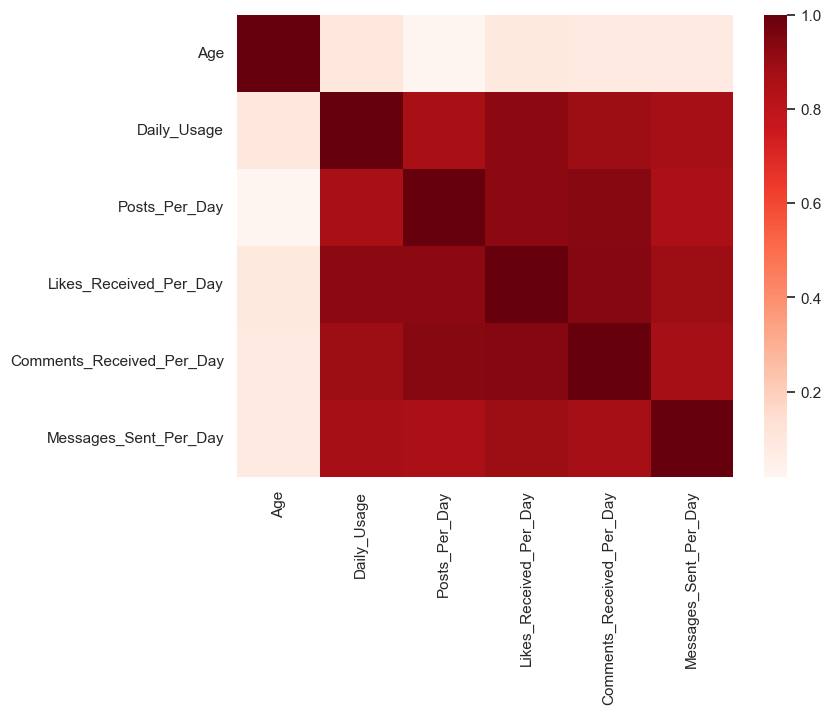

In [27]:
mpl.rcParams['figure.figsize'] = [8, 6]
df_quantity = df.iloc[:,[0,3,4,5,6,7]]
sns.heatmap(df_quantity.corr(), cmap="Reds")

Findings:
1. daily usage, posts, msgs sent & likes/comments received are highly and positively correlated
2. age has little to do with the factors above